## Generation of boxplot for Report purpose

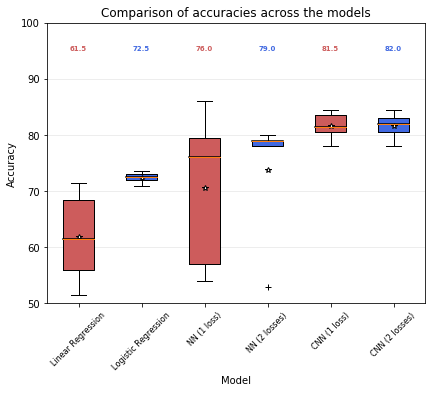

In [38]:
linreg = [51.5, 56.0, 68.5, 61.5, 71.5]
logreg = [72.0, 71.0, 73.0, 72.5, 73.5]
nn1 = [76.0, 57.0, 86.0, 54.0, 79.5]
nn2 = [78.0, 79.0, 80.0, 79.0, 53.0]
cnn1 = [81.5, 78.0, 83.5, 84.5, 80.5]
cnn2 = [78.0, 80.5, 82.0, 83.0, 84.5]

randomDists = ['Linear Regression', 'Logistic Regression', 'NN (1 loss)', 'NN (2 losses)',
               'CNN (1 loss)', 'CNN (2 losses)']

data = [linreg, logreg, nn1, nn2, cnn1, cnn2]

fig, ax1 = plt.subplots(figsize=(6, 6))
fig.canvas.set_window_title('A Boxplot Example')
fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = ax1.boxplot(data, notch=0, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

# Hide these grid behind plot objects
ax1.set_axisbelow(True)
ax1.set_title('Comparison of accuracies across the models')
ax1.set_xlabel('Model')
ax1.set_ylabel('Accuracy')

numBoxes = 6

# Now fill the boxes with desired colors
boxColors = ['indianred', 'royalblue']
medians = list(range(numBoxes))
for i in range(numBoxes):
    box = bp['boxes'][i]
    boxX = []
    boxY = []
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
    boxCoords = np.column_stack([boxX, boxY])
    # Alternate between Dark Khaki and Royal Blue
    k = i % 2
    boxPolygon = Polygon(boxCoords, facecolor=boxColors[k])
    ax1.add_patch(boxPolygon)
    # Now draw the median lines back over what we just filled in
    med = bp['medians'][i]
    medianX = []
    medianY = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        ax1.plot(medianX, medianY, 'k')
        medians[i] = medianY[0]
    # Finally, overplot the sample averages, with horizontal alignment
    # in the center of each box
    ax1.plot([np.average(med.get_xdata())], [np.average(data[i])],
             color='w', marker='*', markeredgecolor='k')

# Set the axes ranges and axes labels
ax1.set_xlim(0.5, 6 + 0.5)
top = 100
bottom = 50
ax1.set_ylim(bottom, top)
ax1.set_xticklabels(randomDists,
                    rotation=45, fontsize=8)

# Due to the Y-axis scale being different across samples, it can be
# hard to compare differences in medians across the samples. Add upper
# X-axis tick labels with the sample medians to aid in comparison
# (just use two decimal places of precision)
pos = np.arange(numBoxes) + 1
upperLabels = [str(np.round(s, 2)) for s in medians]
weights = ['bold', 'semibold']
for tick, label in zip(range(numBoxes), ax1.get_xticklabels()):
    k = tick % 2
    ax1.text(pos[tick], top - (top*0.05), upperLabels[tick],
             horizontalalignment='center', size='x-small', weight=weights[k],
             color=boxColors[k])

plt.show()
